# **HW1: Data Exploration and Preparation**

# **Part 1: Data Loading and First Look**

# Question 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
dataset = pd.read_csv(filename)

In [4]:
dataset

patient_id  age sex  weight blood_type           current_location  \
0            312    7   F    24.7         A+  ('32.44874', '-99.73314')   
1            787   21   M    86.3         O-   ('38.07789', '13.44275')   
2           1150   28   M    98.9         O+   ('38.07789', '13.44275')   
3            947   20   F    55.9         O+   ('51.40148', '-1.32471')   
4            889   44   M    47.2         O+  ('44.27804', '-88.27205')   
...          ...  ...  ..     ...        ...                        ...   
1245        1028   32   F    54.0         O+   ('52.48173', '-2.12139')   
1246         286   36   M    73.4         A-  ('10.31672', '123.89071')   
1247        1493   13   M    45.2         A+   ('25.92493', '73.66633')   
1248        1750   35   M    98.2         O+     ('6.15038', '6.83042')   
1249        1860    6   M    15.7         A+    ('43.78956', '7.60872')   

      num_of_siblings  happiness_score  household_income  \
0                   2                8             312.3   
1                   4                6             641.5   
2                   1                9             864.2   
3                   3                8             428.3   
4                   3                7             371.1   
...               ...              ...               ...   
1245                1                9             398.6   
1246                2                7             563.1   
1247                1                9             725.4   
1248                2                8             935.8   
1249                0                7            1504.6   

      conversations_per_day  ...      PCR_03      PCR_04    PCR_05     PCR_06  \
0                         3  ...  159.851645   26.157901  5.694267   9.922768   
1                         1  ...  307.760691  362.804629  3.345775  10.055587   
2                         9  ...   38.387342   82.544080  8.345576  21.955904   
3                         3  ...   70.670443  191.832448  5.840627   1.902177   
4                         1  ...  104.775703  315.286222  6.270290   3.917101   
...                     ...  ...         ...         ...       ...        ...   
1245                      4  ...  230.673964  113.357304  3.546478   9.887626   
1246                      2  ...  225.381155   62.891406  3.569395  21.487653   
1247                     13  ...  144.908625  298.896857  9.801984  16.235470   
1248                      3  ...   93.237439  133.925819  7.828380   5.998792   
1249                      1  ...   25.497033  309.390067  3.487956   8.092725   

         PCR_07    PCR_08    PCR_09     PCR_10  spread  risk  
0      0.792541  6.606938  2.093085 -36.636500      -1    -1  
1    -17.976100  8.420971  2.407452 -28.067254       1     1  
2    -20.950704  2.668036  3.235283 -63.154721       1     1  
3     12.292326  1.448408  1.142477 -29.931566      -1    -1  
4    -23.249245  5.782666 -1.987305 -36.738930       1     1  
...         ...       ...       ...        ...     ...   ...  
1245 -15.049791  2.648537 -7.426141 -27.794776       1     1  
1246   7.043367  4.045632 -9.099876 -39.155421      -1    -1  
1247   3.034694  6.521679  6.662441 -65.905576       1    -1  
1248 -12.805863  3.337705 -9.397418 -45.601124       1    -1  
1249  -2.443738  1.168590 -4.523851 -25.261882      -1    -1  

[1250 rows x 26 columns]

In [5]:
dataset.shape

(1250, 26)

# Question 2

In [6]:
print( dataset["num_of_siblings"].value_counts() )

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64


# **Partitioning the data**

# Question 4

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, train_size=0.8, random_state=157)

# **Part 2: Warming up with k-Nearest Neighbors**

# **Basic data exploration**

# Question 5

In [8]:
print("Correlation between PCR_01 and spread is: {:.3f}".format(train.corr().PCR_01.spread))
print("Correlation between PCR_02 and spread is: {:.3f}".format(train.corr().PCR_02.spread))
print("Correlation between PCR_09 and spread is: {:.3f}".format(train.corr().PCR_09.spread))

Correlation between PCR_01 and spread is: 0.081
Correlation between PCR_02 and spread is: 0.504
Correlation between PCR_09 and spread is: -0.039


# Task

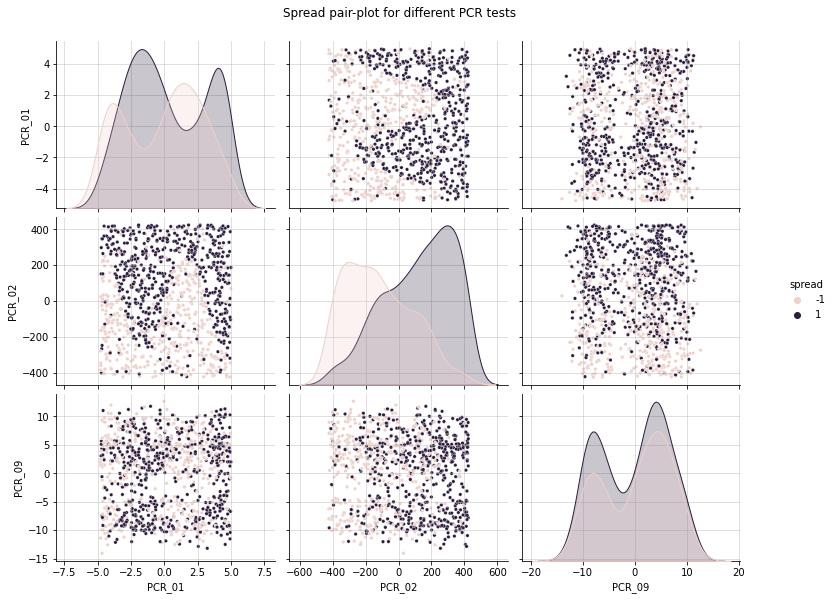

In [9]:
train_pcr_sub = train[["PCR_01", "PCR_02", "PCR_09", "spread"]]
g=sns.pairplot(train_pcr_sub, plot_kws={"s": 12}, hue="spread") 
g.fig.suptitle("Spread pair-plot for different PCR tests", y=1.04)
 
for ax in np.ravel(g.axes): 
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

# **k-NN implementation**

# Task

In [10]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist

class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors
    self.points = None
    self.labels = None

  def fit(self, X, y):
    # self.set_params(X_train = X, y_train = y)
    self.points = np.copy(X)
    self.ylabels = np.copy(y)
    return self

  def predict(self, X):
    dist_mat = cdist(X, self.points)
    k_neighbors = np.argpartition(dist_mat, kth=self.n_neighbors)[ : ,  : self.n_neighbors]
    predictions = None
    k_neighbors_labels = np.array(self.ylabels)[k_neighbors.astype(int)]
    predictions = np.sign(np.array(np.sum(k_neighbors_labels, axis=1)))
    predictions[predictions == 0] = 1  
    return predictions

In [11]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

# Task

Model's training accuracy:  1.0
Model's test accuracy:  0.752 



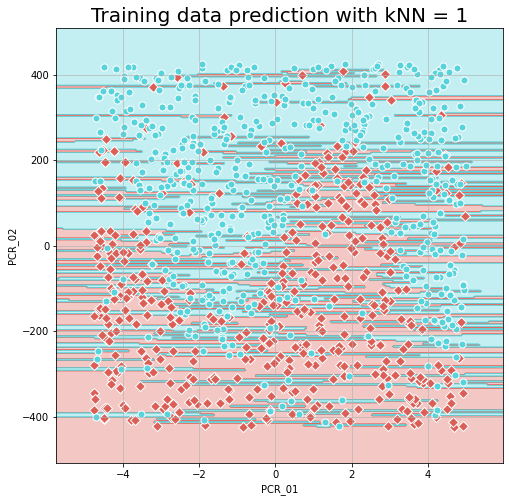

In [12]:
X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(train, columns=["spread"])


X_test = pd.DataFrame(test, columns=["PCR_01", "PCR_02"])
y_test = pd.DataFrame(test, columns=["spread"])

h = kNN(n_neighbors=1)
h.fit(X=X_train, y=y_train)
print("Model's training accuracy: ", h.score(X_train, y_train))
print("Model's test accuracy: ", h.score(X_test, y_test), "\n")


visualize_clf(h, X_train.to_numpy(), y_train.to_numpy(), 'Training data prediction with kNN = 1', 'PCR_01', 'PCR_02')

# **Data Normalization**

# Question 8

Model's training accuracy:  1.0
Model's test accuracy:  0.824 



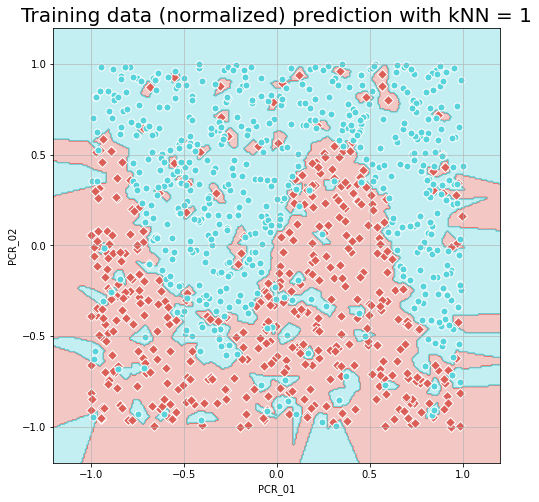

In [13]:
from sklearn.preprocessing import MinMaxScaler


X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(train, columns=["spread"])

scalar = MinMaxScaler((-1, 1))
X_train_norm = scalar.fit_transform(X_train)

X_test_norm = pd.DataFrame(test, columns=["PCR_01", "PCR_02"])
y_test_norm = pd.DataFrame(test, columns=["spread"])

X_test_norm = scalar.fit_transform(X_test)

h_norm = kNN(n_neighbors=1)
h_norm.fit(X=X_train_norm, y=y_train)
print("Model's training accuracy: ", h_norm.score(X_train_norm, y_train))
print("Model's test accuracy: ", h_norm.score(X_test_norm, y_test),"\n")


visualize_clf(h_norm, X_train_norm, y_train, 'Training data (normalized) prediction with kNN = 1', 'PCR_01', 'PCR_02')

# Question 9

Model's training accuracy:  0.873
Model's test accuracy:  0.888 



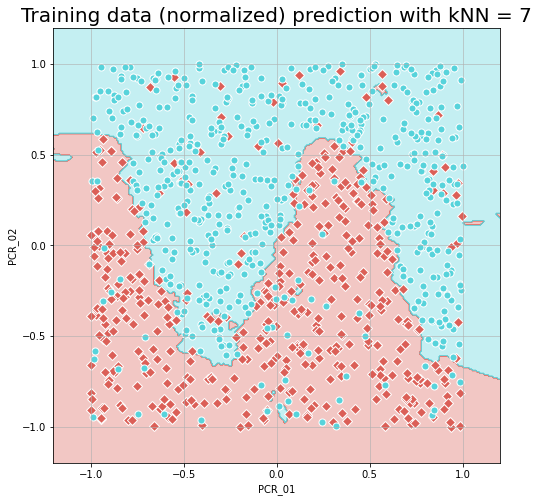

In [14]:
from sklearn.preprocessing import MinMaxScaler


X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(train, columns=["spread"])

scalar = MinMaxScaler((-1, 1))
X_train_norm = scalar.fit_transform(X_train)

X_test_norm = pd.DataFrame(test, columns=["PCR_01", "PCR_02"])
y_test_norm = pd.DataFrame(test, columns=["spread"])

X_test_norm = scalar.fit_transform(X_test)

h_norm = kNN(n_neighbors=7)
h_norm.fit(X=X_train_norm, y=y_train)
print("Model's training accuracy: ", h_norm.score(X_train_norm, y_train))
print("Model's test accuracy: ", h_norm.score(X_test_norm, y_test),"\n")


visualize_clf(h_norm, X_train_norm, y_train, 'Training data (normalized) prediction with kNN = 7', 'PCR_01', 'PCR_02')

# **Part 3: Data Exploration**

# Question 12

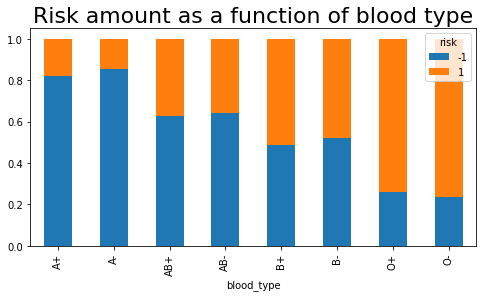

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(ncols=1, sharey=False, figsize=(8,4))
ax1.grid(alpha=0.5)
ax1.set_title("Risk amount as a function of blood type", fontsize=22)
_ = pd.crosstab(dataset['blood_type'], dataset['risk'], normalize="index").plot(kind='bar', stacked=True, ax=ax1)

# Task

In [16]:
group0_bool = train["blood_type"].isin(["O+", "O-"])
group1_bool = train["blood_type"].isin(["B+", "B-"])
group2_bool = train["blood_type"].isin(["A+", "A-","AB+", "AB-"])

In [17]:
new_blood_columns = [[], [], []]
for i in range(0, len(group0_bool)):
  if np.array(group0_bool)[i]:
    new_blood_columns[0].append(1)
  else:
    new_blood_columns[0].append(0)

  if np.array(group1_bool)[i]:
    new_blood_columns[1].append(1)
  else:
    new_blood_columns[1].append(0)
  
  if np.array(group2_bool)[i]:
    new_blood_columns[2].append(1)
  else:
    new_blood_columns[2].append(0)

In [18]:
train_fixed_blood_type = train.drop('blood_type', inplace=False, axis=1)
train_fixed_blood_type["blood_type_group_zero"] = new_blood_columns[0]
train_fixed_blood_type["blood_type_group_one"] = new_blood_columns[1]
train_fixed_blood_type["blood_type_group_two"] = new_blood_columns[2]

# Question 13

In [19]:
str_list = [string for string in train["symptoms"].unique() if not pd.isnull(string) ]
symptoms_list = []
symptoms_columns = []

for string in str_list:
  current_symptoms = string.split(';')
  for symptom in current_symptoms:
    if(not (symptom in symptoms_list)):
      symptoms_list.append(symptom)
      symptoms_columns.append([])

# Task

In [20]:
from matplotlib.font_manager import json_dump
male_on_index = np.array(train["sex"].isin(["M"]))
location_list = np.array(train["current_location"])
date_list = np.array(train["pcr_date"])
symptoms_array = np.array(train["symptoms"])

sex_column = []
location_x_column = []
location_y_column = []
day_list = []
month_list = []
year_list = []


for i in range(train.shape[0]):
  binary_sex = 0
  if male_on_index[i]:
    binary_sex = 1
  sex_column.append(binary_sex)
  
  current_location = location_list[i].strip("(')").replace("'","").replace(" ","").split(',')
  location_x_column.append( float(current_location[0]) )
  location_y_column.append( float(current_location[1]) )

  current_date = date_list[i].split('-')
  year_list.append( int(current_date[0]) )
  month_list.append( int(current_date[1]) )
  day_list.append( int(current_date[2]) )
  
  j = 0
  for symptom in symptoms_list:
    symptom_exists = 0
    if not pd.isnull(symptoms_array[i]) and symptom in symptoms_array[i]:
      symptom_exists = 1
    symptoms_columns[j].append(symptom_exists)
    j += 1

In [21]:
train_fixed_types = train_fixed_blood_type.drop('sex', inplace=False, axis=1).drop('current_location', inplace=False, axis=1).drop('pcr_date', inplace=False, axis=1).drop('symptoms', inplace=False, axis=1)
train_fixed_types["sex"] = sex_column
train_fixed_types["x_location"] = location_x_column
train_fixed_types["y_location"] = location_y_column
train_fixed_types["pcr_day"] = day_list
train_fixed_types["pcr_month"] = month_list
train_fixed_types["pcr_year"] = year_list


j = 0
for symptom in symptoms_list:
  train_fixed_types[symptom] = symptoms_columns[j]
  j += 1

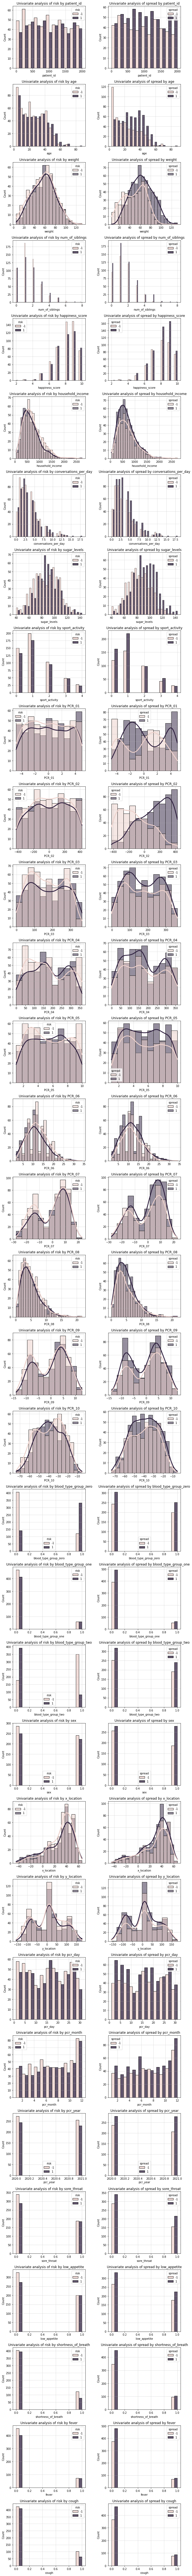

In [47]:
COL_NAME = train_fixed_types.columns.drop("risk").drop("spread") #remove risk and spread
COLS = 2
ROWS = len(COL_NAME)
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
 column = COL_NAME[row]
 for j, cls in enumerate(["risk", "spread"]):
  plt.subplot(ROWS,COLS, row * COLS + 1 + j)

  isContinuous = "float" in train_fixed_types[column].dtype.name
  sns.histplot(data=train_fixed_types, x=column, hue=cls, line_kws={"linewidth": 3},
               kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)
  plt.title("Univariate analysis of {factor} by {col}".format(factor = cls, col = column))
plt.tight_layout()

# Question 16

In [23]:
s = train_fixed_types.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                     1.000000
blood_type_group_two     0.492880
blood_type_group_zero    0.475704
shortness_of_breath      0.085330
cough                    0.083534
household_income         0.078862
PCR_06                   0.077971
x_location               0.065928
PCR_09                   0.053347
PCR_03                   0.045069
age                      0.044493
low_appetite             0.044155
weight                   0.041105
PCR_07                   0.038183
sore_throat              0.035313
PCR_01                   0.033357
patient_id               0.031253
spread                   0.030398
y_location               0.026196
conversations_per_day    0.025610
num_of_siblings          0.024569
PCR_10                   0.023107
blood_type_group_one     0.022801
fever                    0.019426
sugar_levels             0.016302
sex                      0.014169
PCR_04                   0.013863
sport_activity           0.008819
happiness_score          0.006002
pcr_month     

# Question 17

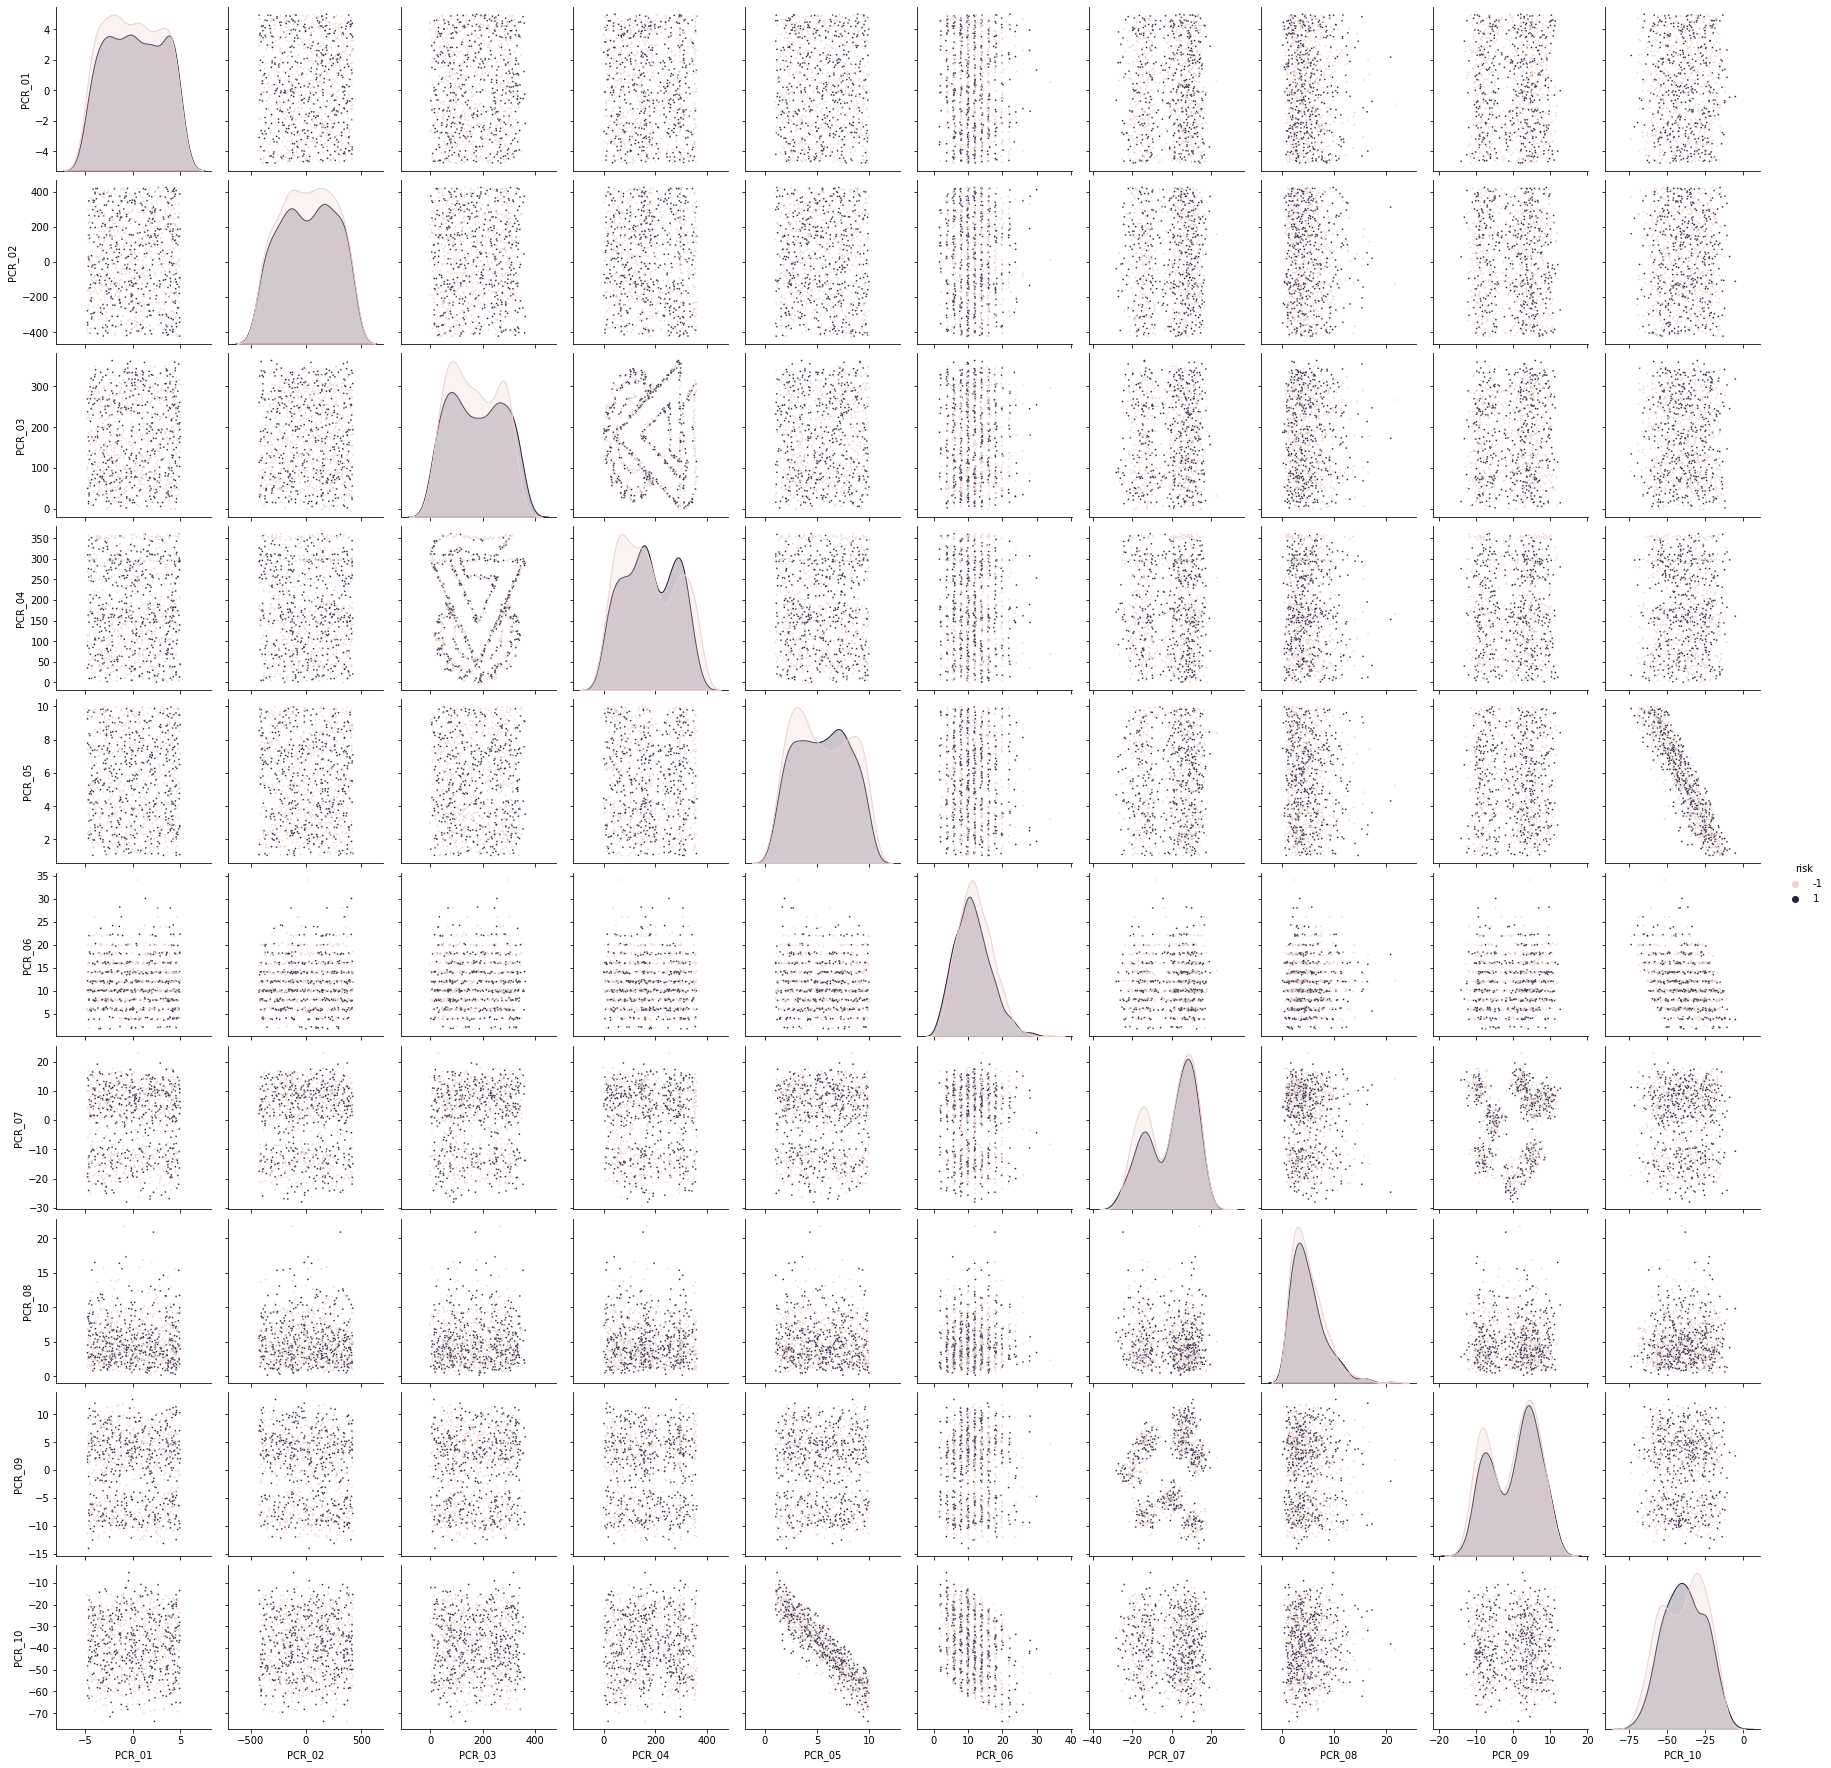

In [24]:
sns.pairplot(train_fixed_types[train_fixed_types.filter(like='PCR').columns.tolist() + ["risk"]], 
             plot_kws={"s": 3}, hue="risk")

# Question 18

In [25]:
train_only_zero_group = train_fixed_types.loc[train_fixed_types["blood_type_group_zero"] == 1]
train_only_one_group = train_fixed_types.loc[train_fixed_types["blood_type_group_one"] == 1]
train_only_two_group = train_fixed_types.loc[train_fixed_types["blood_type_group_two"] == 1]
train_only_groups = [train_only_zero_group, train_only_one_group, train_only_two_group]

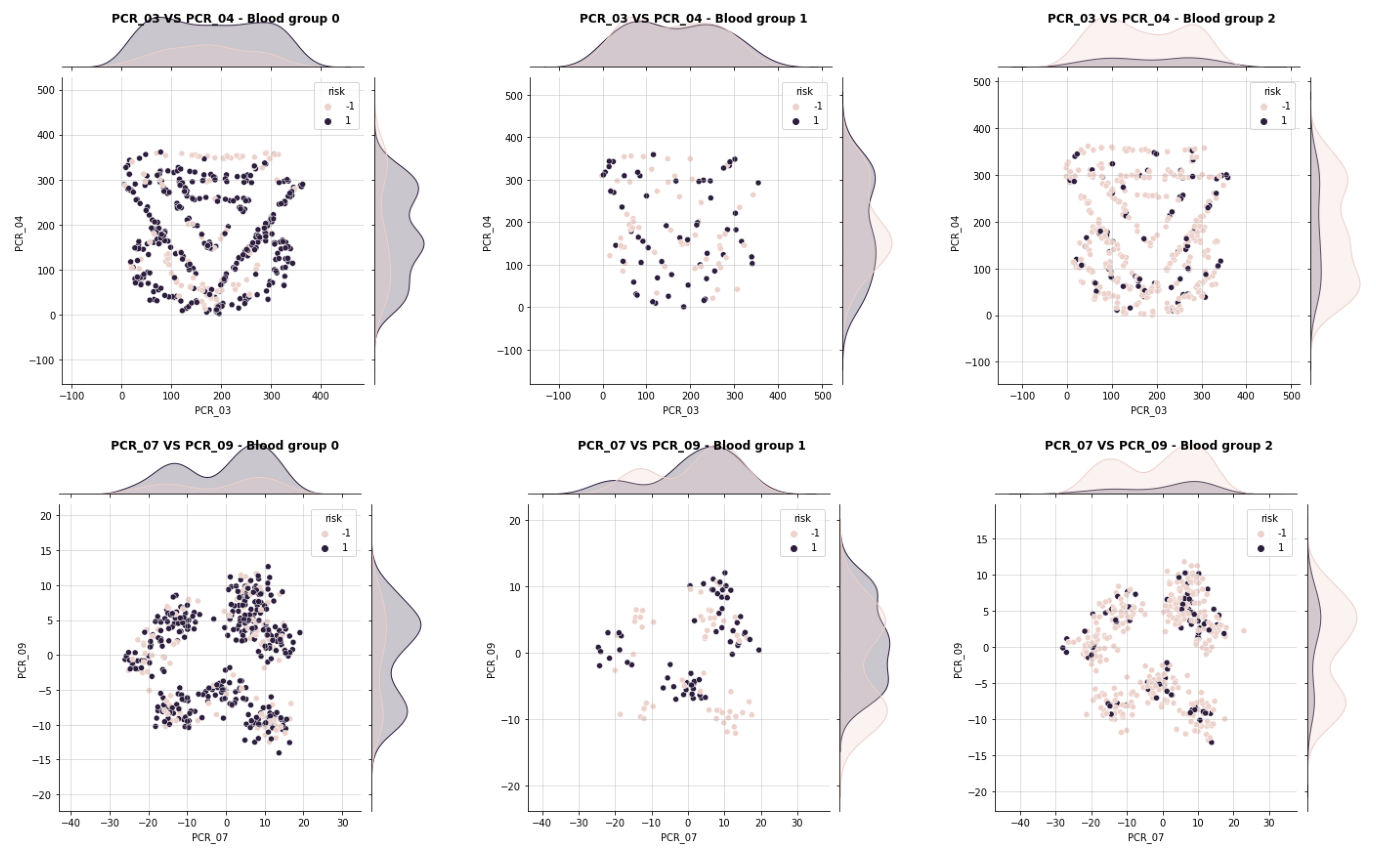

In [26]:
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

graph_list = []

graph_list.append(sns.jointplot(data = train_only_zero_group , x = train_only_zero_group.PCR_03, y = train_only_zero_group.PCR_04, hue="risk"))
graph_list.append(sns.jointplot(data = train_only_one_group , x = train_only_one_group.PCR_03, y = train_only_one_group.PCR_04, hue="risk"))
graph_list.append(sns.jointplot(data = train_only_two_group , x = train_only_two_group.PCR_03, y = train_only_two_group.PCR_04, hue="risk"))
graph_list.append(sns.jointplot(data = train_only_zero_group , x = train_only_zero_group.PCR_07, y = train_only_zero_group.PCR_09, hue="risk"))
graph_list.append(sns.jointplot(data = train_only_one_group , x = train_only_one_group.PCR_07, y = train_only_one_group.PCR_09, hue="risk"))
graph_list.append(sns.jointplot(data = train_only_two_group , x = train_only_two_group.PCR_07, y = train_only_two_group.PCR_09, hue="risk"))

titles = ['PCR_03 VS PCR_04 - Blood group 0', 'PCR_03 VS PCR_04 - Blood group 1', 'PCR_03 VS PCR_04 - Blood group 2',
          ' PCR_07 VS PCR_09 - Blood group 0', 'PCR_07 VS PCR_09 - Blood group 1', 'PCR_07 VS PCR_09 - Blood group 2']

for index, g in enumerate(graph_list):
  g.ax_joint.grid(alpha=0.5)
  g.fig.suptitle(titles[index], fontweight ="bold")


graph_list[0].savefig('g1.png')
plt.close(graph_list[0].fig)

graph_list[1].savefig('g2.png')
plt.close(graph_list[1].fig)

graph_list[2].savefig('g3.png')
plt.close(graph_list[2].fig)

graph_list[3].savefig('g4.png')
plt.close(graph_list[3].fig)

graph_list[4].savefig('g5.png')
plt.close(graph_list[4].fig)

graph_list[5].savefig('g6.png')
plt.close(graph_list[5].fig)



f, axarr = plt.subplots(2, 3, figsize=(20, 12))

axarr[0,0].imshow(mpimg.imread('/content/g1.png'))
axarr[0,1].imshow(mpimg.imread('/content/g2.png'))
axarr[0,2].imshow(mpimg.imread('/content/g3.png'))
axarr[1,0].imshow(mpimg.imread('/content/g4.png'))
axarr[1,1].imshow(mpimg.imread('/content/g5.png'))
axarr[1,2].imshow(mpimg.imread('/content/g6.png'))


[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()


# **Part 4: More Data Normalization**

# Task

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

train_fixed_types.reset_index()

minmax_features_names = ["patient_id", "PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_09", "pcr_day", "pcr_month", "pcr_year"]
scalar_features_names = ["age", "weight", "num_of_siblings", "happiness_score", "household_income", "conversations_per_day", "sugar_levels", "sport_activity", "PCR_06", "PCR_07", "PCR_08", "PCR_09", "PCR_10", "x_location", "y_location"]
train_normalized = pd.DataFrame(train_fixed_types, columns=["cough", "fever", "shortness_of_breath", "low_appetite", "sore_throat", "sex", "blood_type_group_zero", "blood_type_group_one", "blood_type_group_two", "spread", "risk"])

minmax = MinMaxScaler((-1, 1))

for name in minmax_features_names:
  train_normalized[name] = minmax.fit_transform( pd.DataFrame(train_fixed_types, columns=[name]) ) 


scalar = StandardScaler()

for name in scalar_features_names:
  train_normalized[name] = scalar.fit_transform( pd.DataFrame(train_fixed_types, columns=[name]) )


# Question 21

In [29]:
graph_data_frame = pd.DataFrame(train_fixed_types["weight"])
graph_data_frame["normalized_weight"] = train_normalized["weight"]
graph_data_frame["risk"] = train_normalized["risk"]
graph_data_frame["spread"] = train_normalized["spread"]

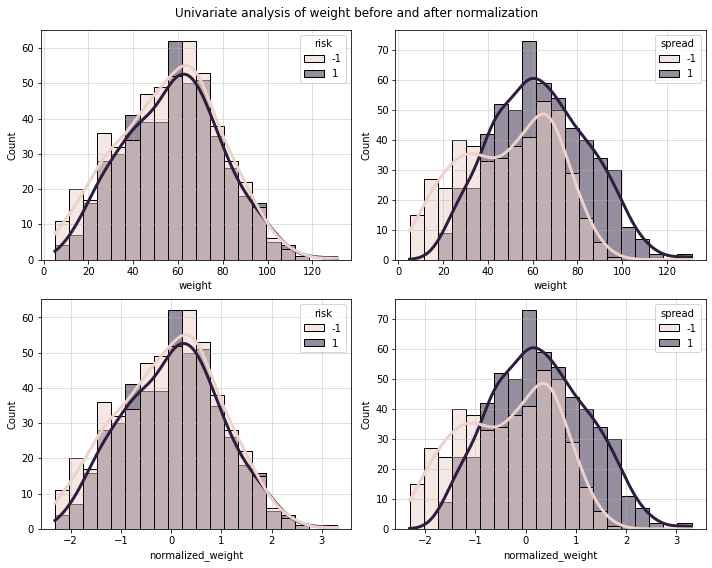

In [46]:
COL_NAME = ['weight', 'normalized_weight']
COLS = 2
ROWS = len(COL_NAME) 
graph = plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
 column = COL_NAME[row]
 for j, cls in enumerate(["risk", "spread"]):
  plt.subplot(ROWS,COLS, row * COLS + 1 + j)

  isContinuous = "float" in graph_data_frame[column].dtype.name
  sns.histplot(data=graph_data_frame, x=column, hue=cls, line_kws={"linewidth": 3},
               kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)
graph.suptitle("Univariate analysis of weight before and after normalization")
plt.tight_layout()
graph.subplots_adjust(top=0.94)

# **Part 5: Feature Selection**

# **Automatic Feature Selection**

# Question 23

In [31]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

only_features = train_normalized.drop('spread', inplace=False, axis=1).drop('risk', inplace=False, axis=1)
only_target = pd.DataFrame(train_normalized["spread"])

kNNClassifier = KNeighborsClassifier(n_neighbors=5)

featureSelect = SequentialFeatureSelector(kNNClassifier, n_features_to_select = 3)
selected_features = featureSelect.fit(only_features, y = only_target)

In [32]:
selected_features_names = featureSelect.get_feature_names_out()
for i, name in enumerate(selected_features_names):
  print("The " + str(i + 1) + " selected feature is " + name)

The 1 selected feature is PCR_01
The 2 selected feature is PCR_02
The 3 selected feature is weight


In [33]:
print("Correlation between weight and PCR_01 is: {:.3f}".format(train_normalized.corr().weight.PCR_01))
print("Correlation between weight and PCR_02 is: {:.3f}".format(train_normalized.corr().weight.PCR_02))
print("Correlation between weight and sugar_levels is: {:.3f}".format(train_normalized.corr().weight.sugar_levels))

Correlation between weight and PCR_01 is: 0.016
Correlation between weight and PCR_02 is: 0.003
Correlation between weight and sugar_levels is: 0.600


# Task (After Question 26)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import json_dump

# Helper Functions:

def blood_type_seperation(new_data):
  group0_bool = new_data["blood_type"].isin(["O+", "O-"])
  group1_bool = new_data["blood_type"].isin(["B+", "B-"])
  group2_bool = new_data["blood_type"].isin(["A+", "A-","AB+", "AB-"])

  new_blood_columns = [[], [], []]
  for i in range(0, len(group0_bool)):
    if np.array(group0_bool)[i]:
      new_blood_columns[0].append(1)
    else:
      new_blood_columns[0].append(0)

    if np.array(group1_bool)[i]:
      new_blood_columns[1].append(1)
    else:
      new_blood_columns[1].append(0)
    
    if np.array(group2_bool)[i]:
      new_blood_columns[2].append(1)
    else:
      new_blood_columns[2].append(0)
    
  new_data = new_data.drop('blood_type', inplace=False, axis=1)
  new_data["blood_type_group_zero"] = new_blood_columns[0]
  new_data["blood_type_group_one"] = new_blood_columns[1]
  new_data["blood_type_group_two"] = new_blood_columns[2]
  return new_data



def symptoms_correction(new_data):
  str_list = [string for string in new_data["symptoms"].unique() if not pd.isnull(string) ]
  symptoms_list = []
  symptoms_columns = []

  for string in str_list:
    current_symptoms = string.split(';')
    for symptom in current_symptoms:
      if(not (symptom in symptoms_list)):
        symptoms_list.append(symptom)
        symptoms_columns.append([])

  symptoms_array = np.array(new_data["symptoms"])
  for i in range(new_data.shape[0]):
    j = 0
    for symptom in symptoms_list:
      symptom_exists = 0
      if not pd.isnull(symptoms_array[i]) and symptom in symptoms_array[i]:
        symptom_exists = 1
      symptoms_columns[j].append(symptom_exists)
      j += 1

  new_data = new_data.drop('symptoms', inplace=False, axis=1)
  j = 0
  for symptom in symptoms_list:
    new_data[symptom] = symptoms_columns[j]
    j += 1
  
  return new_data



def columns_correction_to_ordinal(new_data):
  male_on_index = np.array(new_data["sex"].isin(["M"]))
  location_list = np.array(new_data["current_location"])
  date_list = np.array(new_data["pcr_date"])

  sex_column = []
  location_x_column = []
  location_y_column = []
  day_list = []
  month_list = []
  year_list = []


  for i in range(new_data.shape[0]):
    binary_sex = 0
    if male_on_index[i]:
      binary_sex = 1
    sex_column.append(binary_sex)
    
    current_location = location_list[i].strip("(')").replace("'","").replace(" ","").split(',')
    location_x_column.append( float(current_location[0]) )
    location_y_column.append( float(current_location[1]) )

    current_date = date_list[i].split('-')
    year_list.append( int(current_date[0]) )
    month_list.append( int(current_date[1]) )
    day_list.append( int(current_date[2]) )

  new_data = new_data.drop('sex', inplace=False, axis=1).drop('current_location', inplace=False, axis=1).drop('pcr_date', inplace=False, axis=1)
  new_data["is_male"] = sex_column
  new_data["x_location"] = location_x_column
  new_data["y_location"] = location_y_column
  new_data["pcr_day"] = day_list
  new_data["pcr_month"] = month_list
  new_data["pcr_year"] = year_list

  return new_data


def prepare_data(training_data, new_data):
  new_data_copy = new_data.copy()
  training_data_copy = training_data.copy()
  
  new_data_copy = blood_type_seperation(new_data_copy)
  new_data_copy = symptoms_correction(new_data_copy)
  new_data_copy = columns_correction_to_ordinal(new_data_copy)
  training_data_copy = blood_type_seperation(training_data_copy)
  training_data_copy = symptoms_correction(training_data_copy)
  training_data_copy = columns_correction_to_ordinal(training_data_copy)

  new_data_copy.reset_index()

  minmax_features_names = ["patient_id", "PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_09", "pcr_day", "pcr_month", "pcr_year"]
  scalar_features_names = ["age", "weight", "num_of_siblings", "happiness_score", "household_income", "conversations_per_day", "sugar_levels", "sport_activity", "PCR_06", "PCR_07", "PCR_08", "PCR_09", "PCR_10", "x_location", "y_location"]
  data_normalized = pd.DataFrame(new_data_copy, columns=["cough", "fever", "shortness_of_breath", "low_appetite", "sore_throat", "is_male", "blood_type_group_zero", "blood_type_group_one", "blood_type_group_two", "spread", "risk"])

  minmax = MinMaxScaler((-1, 1))

  for name in minmax_features_names:
    minmax.fit( pd.DataFrame(training_data_copy, columns=[name]) )
    data_normalized[name] = minmax.transform( pd.DataFrame(new_data_copy, columns=[name]) )

  scalar = StandardScaler()

  for name in scalar_features_names:
    scalar.fit( pd.DataFrame(training_data_copy, columns=[name]) )
    data_normalized[name] = scalar.transform( pd.DataFrame(new_data_copy, columns=[name]) )
  
  return data_normalized


In [48]:
train_df_prepare = prepare_data(train, train)
test_df_prepare = prepare_data(train, test)